#Questions:



1. Do campaigns/calls work better during specific periods (such as on certain days or months)?

2. Are there specific customer clusters (similar customers) that are generally more responsive, and what are the similar characteristics that contribute to this responsiveness?

3. Does the duration of the call and how often they are called affect how likely they are to respond, and how long until they respond if so.

4. Are there any patterns of campaign responsiveness between telephone and cellular contact (such as people contacted via telephone are more likely to respond to the campaign)?

5. What key factors can help predict whether a customer will deposit in response to the campaign (such as whether they had loans, marital status, etc.)



In [73]:
import pandas as pd
import numpy as np

bank = pd.read_csv('https://raw.githubusercontent.com/RamyQ/Individual_Project/refs/heads/main/data/bank-full%5B1%5D.csv', sep=';')
bank['y_binary'] = bank['y'].apply(lambda x: 1 if x == 'yes' else 0)
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,y_binary
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0


In [74]:
bank['pdays'] = bank['pdays'].apply(lambda x: 0 if x == -1 else x)
X = bank.drop(['y', 'y_binary'], axis = 1)
y = bank['y_binary']
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,y_binary
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,0,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,0,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,0,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,0,0,unknown,no,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,0,0,unknown,no,0


In [75]:
bank.shape

(45211, 18)

In [76]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous,y_binary
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,41.015195,0.580323,0.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,99.792615,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,0.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,0.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,0.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [77]:
bank[bank.describe().columns].corr()

,age,balance,day,duration,campaign,pdays,previous,y_binary
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023841,0.001288,0.025155
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003330,0.016674,0.052838
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093024,-0.051710,-0.028348
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001584,0.001203,0.394521
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088508,-0.032855,-0.073172
pdays,-0.023841,0.003330,-0.093024,-0.001584,-0.088508,1.000000,0.454288,0.103323
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454288,1.000000,0.093236
y_binary,0.025155,0.052838,-0.028348,0.394521,-0.073172,0.103323,0.093236,1.000000


# Save datasets

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)
X_test.to_csv('X_test.csv', index = False)
y_test.to_csv('y_test.csv', index = False)

#1. Do campaigns/calls work better during specific periods (such as on certain days or months)?

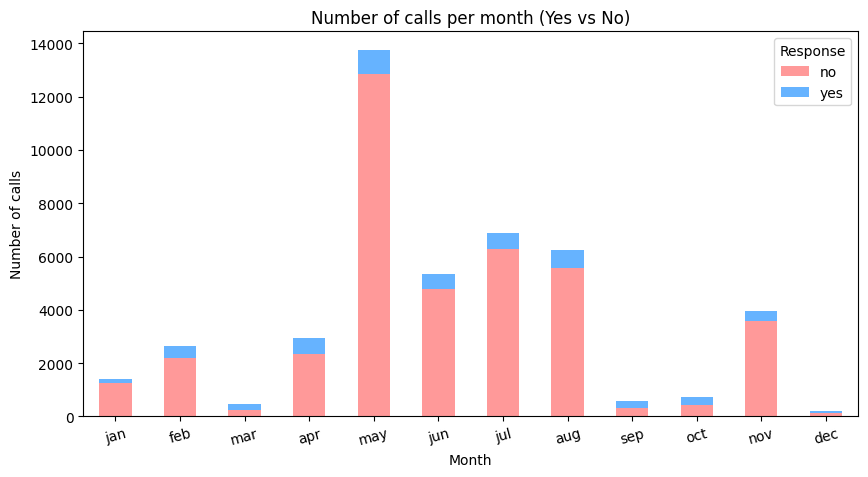

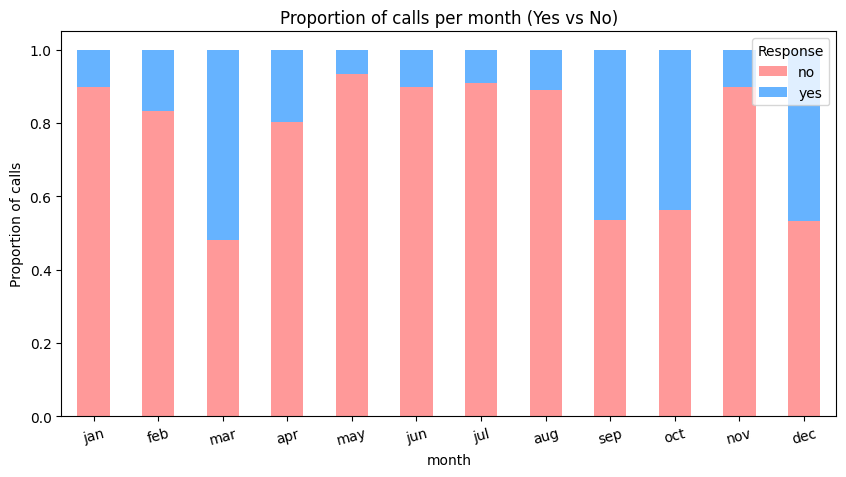

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns


order_of_months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
bank['month'] = pd.Categorical(bank['month'], categories=order_of_months, ordered=True) # make it ordered month from jan-dec

fig, ax = plt.subplots(figsize = (10, 5))
bank.groupby('month', observed = False)['y'].value_counts().unstack().plot(kind='bar', stacked=True, ax = ax, color = ['#ff9999','#66b3ff'])
ax.set_title('Number of calls per month (Yes vs No)')
ax.set_ylabel('Number of calls')
ax.set_xlabel('Month')
plt.xticks(rotation = 15)
plt.legend(title = 'Response', loc = 'upper right')
fig.savefig('calls_per_month.png')

fig1, ax1 = plt.subplots(figsize = (10, 5))
proportion_df = bank.groupby('month', observed = False)['y'].value_counts(normalize = True)
proportion_df.unstack().plot(kind='bar', stacked=True, ax = ax1, color = ['#ff9999','#66b3ff'])
ax1.set_title('Proportion of calls per month (Yes vs No)')
ax1.set_ylabel('Proportion of calls')
plt.xticks(rotation = 15)
plt.legend(title = 'Response', loc = 'upper right')
fig1.savefig('proportion_calls_per_month.png')


plt.show()

To understand whether campaign calls work better during certain months, we will look at both volume and proportions of yes/no responses to campaigns call per month. From these plots, we can see that most calls were made in may, however a small percentage of those responded with yes, while in months such as february, september, and october had near 50% rate of yes response to campaign, although they had lower volume. The overall trend seems that as the volume of call goes up, the proportion of answering yes to the campaign lowers, indicating that there might hidden patterns behind these months that lead to these higher rates of response yet lower volume.

#2. Are there specific customer clusters (similar customers) that are generally more responsive, and what are the similar characteristics that contribute to this responsiveness?

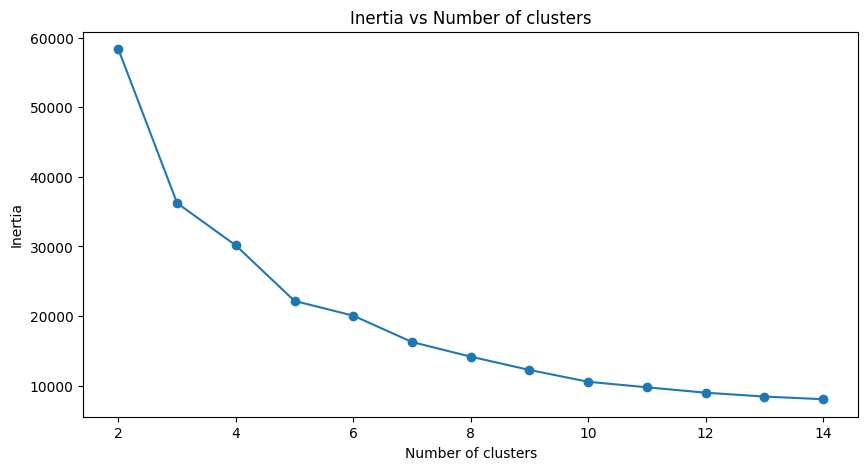

In [80]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

two_features = bank[['age', 'balance']]
two_feature_sampled = two_features.sample(1000, random_state = 0)

scaler = StandardScaler()
scaled_features = scaler.fit_transform(two_features)

clusters = range(2, 15)
inertias = []
silhouettes = []

for i in clusters:
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(scaled_features)
    inertias.append(kmeans.inertia_)

fig, _ = plt.subplots(figsize = (10, 5))
plt.plot(clusters, inertias, marker = 'o')
plt.title('Inertia vs Number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
fig.savefig('inertia.png')
plt.show()

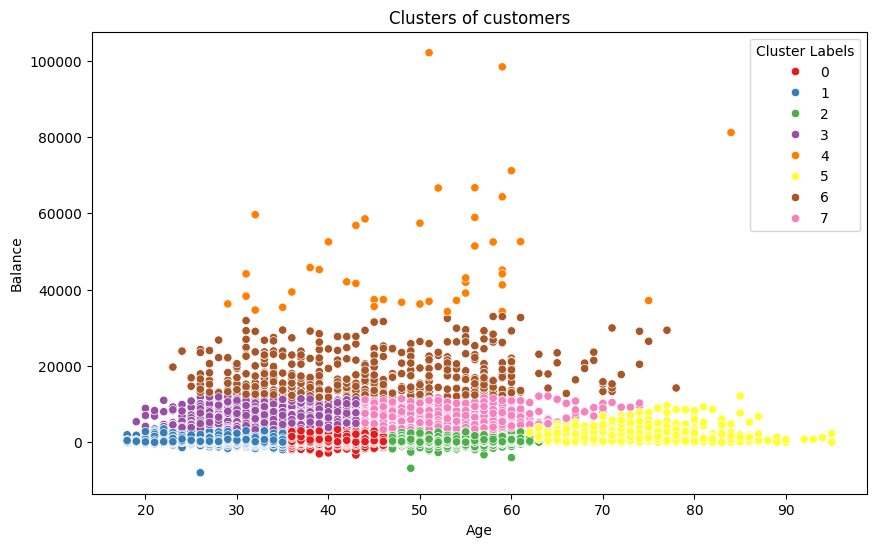

In [81]:
best_kmean = KMeans(n_clusters = 8, random_state = 0)
best_kmean.fit(scaled_features)
labels = best_kmean.labels_

fig, ax = plt.subplots(figsize = (10,6))
sns.scatterplot(x = two_features['age'], y = two_features['balance'], hue = labels, palette='Set1', ax = ax)
plt.xlabel('Age')
plt.ylabel('Balance')
plt.title('Clusters of customers')
ax.legend(title = 'Cluster Labels', loc = 'upper right')
fig.savefig('Customer Clusters 8.png')
plt.show()

In [82]:
bank['cluster_labels'] = labels
cluster_percent = bank.groupby('cluster_labels')['y'].value_counts(normalize = True).unstack()*100
sorted_percent = cluster_percent.sort_values(by = 'yes', ascending = False)

percent_table = sorted_percent.map(lambda x: '{:.2f}%'.format(x))
display(percent_table)

top_3_cluster = sorted_percent[:3].index

for i in top_3_cluster:
  cluster_means = bank.groupby('cluster_labels')[['age', 'balance']].mean().loc[i]
  print(f"Cluster {i}: Average age: {cluster_means['age']:.0f}, Average balance: {cluster_means['balance']:.2f}")

y,no,yes
cluster_labels,,
5,56.19%,43.81%
3,83.81%,16.19%
4,84.09%,15.91%
7,84.60%,15.40%
6,86.31%,13.69%
1,87.56%,12.44%
2,90.43%,9.57%
0,91.07%,8.93%


Cluster 5: Average age: 72, Average balance: 1875.90
Cluster 3: Average age: 35, Average balance: 5514.14
Cluster 4: Average age: 51, Average balance: 50119.00


From these clusters, we know that that certain clusters of similar people (based on age and duration) have higher proportation in respond yes to subscribing to a term deposit. Although the percentages may not seem high, it's better to focus on client that have any larger percent of responding yes, because it will return more profit, especially for the similar in client 5, with a 43.81% return of response. For example, in cluster 5, we know that those of the average age of 72 and balance of near 1875.9 are more likely to respond yes when called, all else equal.

#3. Does the duration of the call and how often they are called affect how likely they are to respond, and how long until they respond if so.

In [83]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

call_features = bank[['duration', 'previous', 'y_binary']]
scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(call_features[['duration', 'previous']], call_features['y_binary'], test_size = 0.2, random_state = 0, stratify = call_features['y_binary'])

tree_model = DecisionTreeClassifier(random_state = 0, max_depth = 2)
tree_model.fit(X_train, y_train)

tp, fp, fn, tn = confusion_matrix(y_test, tree_model.predict(X_test)).ravel()
y_pred = tree_model.predict(X_test)
print("Accuracy for decision tree model: ", round(accuracy_score(y_test, y_pred), 2))
print("Accuracy for predicting respond as yes: ", round(tn/(tn + fp), 2))
print("Accuracy for predicting respond as no: ", round(tp/(tp + fn), 2))
print(confusion_matrix(y_test, y_pred))

Accuracy for decision tree model:  0.89
Accuracy for predicting respond as yes:  0.57
Accuracy for predicting respond as no:  0.9
[[7827  158]
 [ 851  207]]


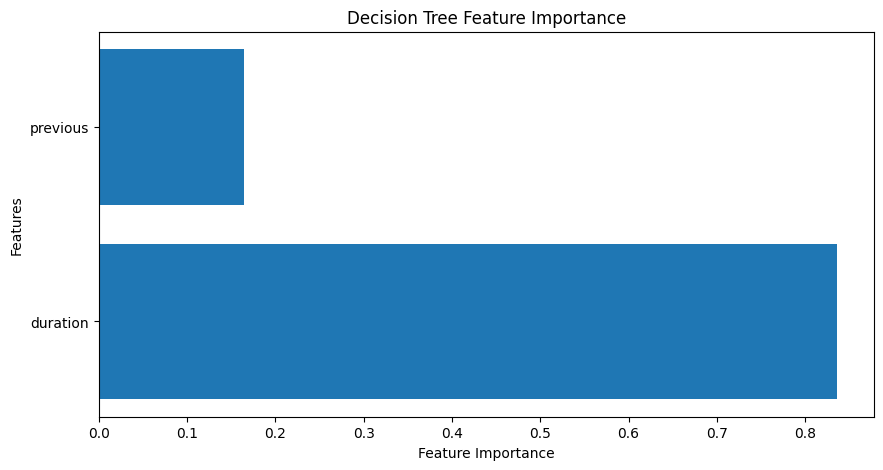

In [84]:
feature_importances = tree_model.feature_importances_

fig, ax = plt.subplots(figsize = (10, 5))
plt.barh(X_train.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Decision Tree Feature Importance')
fig.savefig('two_features_importance_random_forest')
plt.show()

In [85]:
client_respond_yes = bank[bank['y_binary'] == 1].index
client_respond_no = bank[bank['y_binary'] == 0].index

average_respond_time = bank.loc[client_respond_yes, 'pdays'].mean()
average_no_respond_time = bank.loc[client_respond_no, 'pdays'].mean()

print("Average respond time for clients that responded yes: ", int(average_respond_time))
print("Average respond time for clients that did not respond yes: ", int(average_no_respond_time))

Average respond time for clients that responded yes:  69
Average respond time for clients that did not respond yes:  37


The decision tree classifier model had accuracy of 89%, meaning it predicts 89% of whether someone will subscribe a term deposit or not correctly based of the duration and amount of previous calls each person received. We can see that the model perform very well at predicting if people are not going to respond to campaign (90%), but does much worse when predicting if they will respond yes (57%).

This means we can assume that that the duration of the call and how often the client is called can help determine with a high confidence if a person will respond negatively to campaign, but not as a confident on if they will positively respond to the campaign. The feature importances also indicate that knowing the duration of the call has higher importance in predicting response rate compared to the amount of number of previous calls.

When looking at the average pdays (number of days when they were last contacted), the days for those who responded yes (by subscribing a term deposit) is 69 days, while for no it's 37 days.

# 4. Are there any patterns of campaign responsiveness between telephone and cellular contact (such as people contacted via telephone are more likely to respond to the campaign)?

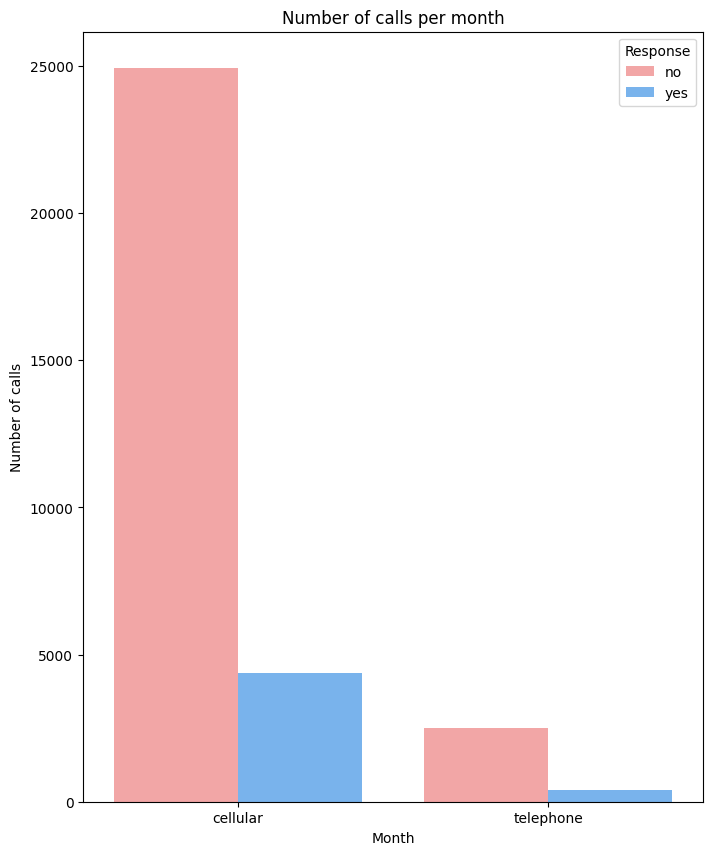

In [86]:
fig, ax = plt.subplots(figsize = (8,10))
sns.countplot(x = bank['contact'], ax = ax, order = ['cellular', 'telephone'], palette = ['#ff9999', '#66b3ff'], hue = bank['y'])
ax.set_title('Number of calls per month')
ax.set_ylabel('Number of calls')
ax.set_xlabel('Month')
plt.legend(title = 'Response', loc = 'upper right')
fig.savefig('calls_monthly_contact.png')
plt.show()

In [87]:
contact_type = bank['contact'].value_counts(normalize = True)*100
print('Percent of customer contacted via cellular:', f"{round(contact_type['cellular'], 1)}%")
print('Percent of customer contacted via telephone:', f"{round(contact_type['telephone'], 1)}%")

contact_response = bank.groupby('contact')['y'].value_counts(normalize = True)[['cellular', 'telephone']].unstack()*100
contact_sorted = contact_response.sort_values(by = 'yes', ascending = False)

contact_table = contact_sorted.map(lambda x: '{:.2f}%'.format(x))
display(contact_table)

Percent of customer contacted via cellular: 64.8%
Percent of customer contacted via telephone: 6.4%


y,no,yes
contact,,
cellular,85.08%,14.92%
telephone,86.58%,13.42%


Most contact for campaigns are via cellular (64.8%), while 6.4% are done via teelephone, and the rest are unknown form of contacts. This means that most clients are called by cellular phone, and when looking at proportions of those who respond yes, there's a bout a 1.5% of responding yes when contacted by cellular than by telephone, which means we can't be confident that those contacted by cellular vs telephone have any pattern of being more likely to subscribe to a term deposit, especially due to lower amount of quantity of calls for telephones.

# 5. What key factors can help predict whether a customer will deposit in response to the campaign (such as whether they had loans, marital status, etc.)

In [88]:
from sklearn.ensemble import RandomForestClassifier

X = bank.drop(['y', 'y_binary'], axis = 1)
y = bank['y_binary']
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
X[categorical_columns] = X[categorical_columns].apply(lambda x: pd.Categorical(x).codes)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)
forest = RandomForestClassifier(random_state = 0, max_depth = 6, n_estimators = 250)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)
tp, fp, fn, tn = confusion_matrix(y_test, y_pred).ravel()
print("Accuracy for decision tree model: ", round(accuracy_score(y_test, y_pred), 2))
print("Accuracy for predicting respond as yes: ", round(tn/(tn + fp), 2))
print("Accuracy for predicting respond as no: ", round(tp/(tp + fn), 2))
print(confusion_matrix(y_test, y_pred))

Accuracy for decision tree model:  0.9
Accuracy for predicting respond as yes:  0.78
Accuracy for predicting respond as no:  0.9
[[7939   46]
 [ 893  165]]


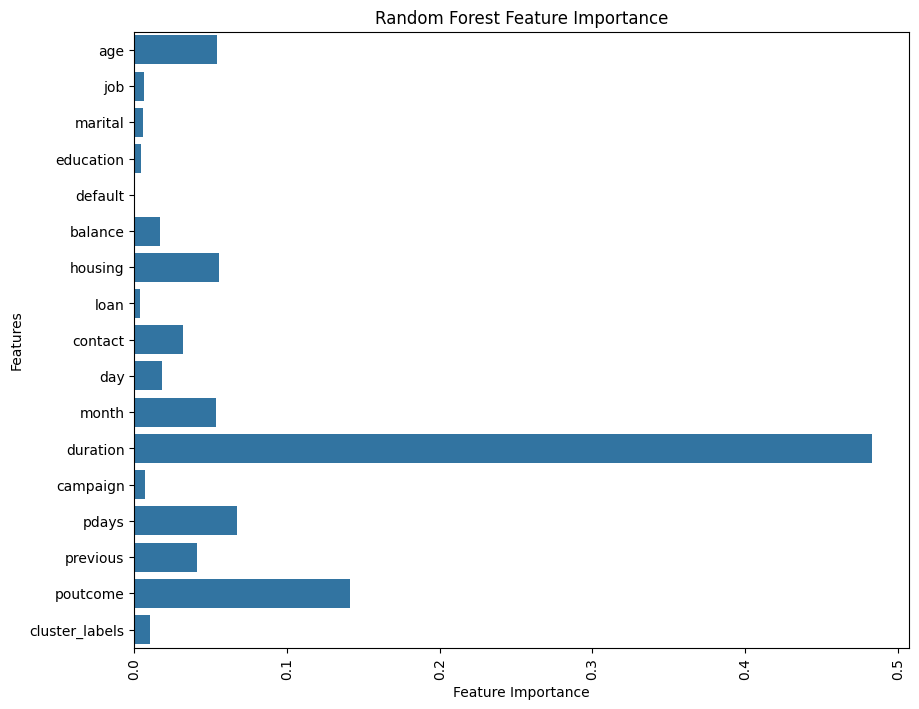

Top 4 important features: duration, poutcome, pdays, housing
Information explained by top 4 features:  0.7467287399722965


In [89]:
fig, ax = plt.subplots(figsize = (10, 8))
sns.barplot(y = X.columns, x = forest.feature_importances_)
plt.xticks(rotation = 90)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance')
fig.savefig('all_features_importance.png')
plt.show()
top4_important_features = X.columns[np.argsort(forest.feature_importances_)[-4:]] # sort feature importances in ascending order, and take last 4 (most important features)
print("Top 4 important features:", end = ' ')
for i in top4_important_features[::-1]:
  (lambda x: print(x, end = ', ') if x in top4_important_features[-3:] else print(x))(i)
print("Information explained by top 4 features: ", np.sum(forest.feature_importances_[np.argsort(forest.feature_importances_)[-4:]]))

The main key factors (four most important) to predicit whether a customer will subscribe a term deposit are duration (duration of call), poutcome (response to campaign from last contact), pdays (number of days passed since last contact to client), and housing (has housing loan). The model with such features had about 90% accuracy, meaning it can predict whether someone will respond or not with high accuracy, and therefore understand these specific features can help us target the right client to use time and money efficiently during campaigns contacts.

Also see improvement in predicting those with response of yes, with a 76% accuracy, although not the best, it's an improvement from 57% seen from the decision tree model using only two features.